In [1]:
# Importing the nessesarry libraries
import pandas as pd
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the data
customer_data_orig = pd.read_csv('./dataset.csv')
customer_data_orig.shape , customer_data_orig.columns  # Printing the data shape and columns
# I printed the columns to have a basic understanding of what kind of data i have in hand

((21983, 30),
 Index(['REGISTRATION_DATE', 'REGISTRATION_COUNTRY', 'PURCHASE_COUNT',
        'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY',
        'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'USER_ID',
        'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
        'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR',
        'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR',
        'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE',
        'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
        'PREFERRED_RESTAURANT_TYPES', 'USER_HAS_VALID_PAYMENT_METHOD',
        'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
        'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
        'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS',
        'PURCHASE_COUNT_BY_STORE_TYPE'],
       dtype='object'))

In [3]:
customer_data_orig['DISTINCT_PURCHASE_VENUE_COUNT'].unique()

array([nan,  1.,  9.,  3.,  6.,  2.,  4., 13.,  7., 34.,  5., 16.,  8.,
       17., 15., 10., 12., 20., 14., 11., 21., 19., 25., 18., 31., 22.,
       71., 32., 39., 68., 30., 26., 29., 27., 23., 24., 38., 41., 36.,
       42., 35.])

In [4]:
customer_data_orig.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


# Exploratory Data Analysis

### Customers who registered but not purchased vs those who made purchase
- Almost 45.3% of the registered customers didn't made any purchase throughout Sep to Oct
- Almost 54.7% of the registered customers made purchases out of which 19% are those who made one time purchase

In [5]:
customer_data = customer_data_orig.set_index('USER_ID')
print("Total Registerd Customer: " ,len(customer_data))
print("Registerd Customer Who didn't Purchase: " ,len(customer_data[customer_data["PURCHASE_COUNT"]==0])) # Non-Active
print("Registerd Customer Who Made Purchases: " ,len(customer_data[customer_data["PURCHASE_COUNT"]>0])) # Active

Total Registerd Customer:  21983
Registerd Customer Who didn't Purchase:  9955
Registerd Customer Who Made Purchases:  12028


It can be seen from above that there are total of 2198 customers out of which 9955 are those who didn't made any purchases.
55% of customers made purchases while 45% of customers didn't made any purchase.

In this analysis the customers who registered but not purchased group is called "NON-ACTIVE"

Another key factor to notice are those customers who made only one time purchase throught the period as follows:

In [6]:
print("Registerd Customer Who Made one time Purchase: " ,len(customer_data[customer_data["PURCHASE_COUNT"]==1])) 

Registerd Customer Who Made one time Purchase:  4179


Out of 12028 customers who made Purchaces, 4179 are those who made only one time purchase throught Sep-Oct Period
almost 1/3

In [7]:
a = len(customer_data[customer_data["PURCHASE_COUNT"]==1]) # one time customer (One-Time Active)
b = len(customer_data[customer_data["PURCHASE_COUNT"]>0]) # Total customer who made purchase (Active)
a/b * 55 # percentage from Active customer who made one time purchase

19.10916195543731

In [8]:
reg_but_null = len(customer_data[customer_data["PURCHASE_COUNT"]==0])
reg_but_one = len(customer_data[customer_data["PURCHASE_COUNT"]==1])
reg_but_more = len(customer_data[customer_data["PURCHASE_COUNT"]>1]) 
total = len(customer_data)

a = reg_but_null/total  # percentage of register but not purchased
b = reg_but_one/total  # percentage of register but purchased one time
c = reg_but_more/total  # percentage of register but purchased more time
print(a,b,c)

0.4528499294909703 0.1901014420233817 0.357048628485648


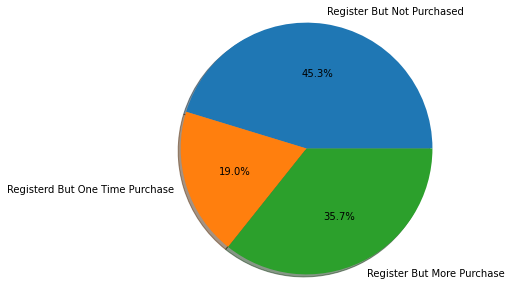

In [9]:
counts = [a,b,c]
labels = ['Register But Not Purchased', 'Registerd But One Time Purchase', 'Register But More Purchase']
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
plt.show()

## Country wise number of customers and purchase counts

- out of 59 countries 40 countries have the customer who registered but didn't made any purchase 
- 19 countries have customers that made purchases
- Majority of customers are from Denmark, Finland and Greece

In [10]:
country_customer_count = pd.DataFrame(customer_data_orig.groupby('REGISTRATION_COUNTRY')['USER_ID'].count())
country_customer_count.rename(columns= {'USER_ID':'NUM_USERS'},inplace=True)
print('Total Number Countries',len(country_customer_count))
country_customer_count.head()

Total Number Countries 59


,NUM_USERS
REGISTRATION_COUNTRY,
ARE,6
AUS,11
AUT,5
AZE,2
BEL,11


In [11]:
country_purchase_group = pd.DataFrame(customer_data_orig.groupby('REGISTRATION_COUNTRY')['PURCHASE_COUNT'].sum())
country_purchase_group.head()

,PURCHASE_COUNT
REGISTRATION_COUNTRY,
ARE,2
AUS,0
AUT,0
AZE,0
BEL,0


In [12]:
# Merging the data to get the country wise number of users and the total purchase count
num_user_pur_count = pd.merge(country_customer_count,country_purchase_group,on='REGISTRATION_COUNTRY')
num_user_pur_count.head()

,NUM_USERS,PURCHASE_COUNT
REGISTRATION_COUNTRY,,
ARE,6,2
AUS,11,0
AUT,5,0
AZE,2,0
BEL,11,0


In [13]:
# The countries Where user only registerd but didn't Purchased Anything
temp = num_user_pur_count[num_user_pur_count['PURCHASE_COUNT']==0]
print(temp.index.to_list())
print("Countries Where User Registered But didn't Purchased: " , len(temp))

['AUS', 'AUT', 'AZE', 'BEL', 'BRA', 'CHE', 'CHL', 'CHN', 'COL', 'ESP', 'FRO', 'GEO', 'GIN', 'HKG', 'IND', 'IRL', 'ISL', 'ITA', 'JOR', 'JPN', 'KOR', 'KWT', 'LBN', 'MEX', 'MLT', 'NLD', 'PAK', 'PHL', 'PRT', 'QAT', 'ROU', 'RUS', 'SAU', 'SGP', 'SVK', 'SVN', 'TUR', 'TWN', 'UKR', 'USA']
Countries Where User Registered But didn't Purchased:  40


## Proceeding with data of only Customers who made purchases

In [14]:
# Only Customer Data who registed and made purchase
customer_data_reg= customer_data_orig[customer_data_orig['PURCHASE_COUNT'] != 0]
customer_data_reg.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
7,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-10-14 00:00:00.000,2020-10-14 00:00:00.000,8,0.0,0.0,...,0.0,1.0,NaN,True,5.0,1.0,NaN,NaN,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
12,2019-09-01 00:00:00.000,FIN,19,19.0,0.0,2020-04-18 00:00:00.000,2020-10-27 00:00:00.000,13,0.0,8.0,...,0.0,0.0,NaN,True,7.0,3.0,11.0,9.0,3.303,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
13,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-08-21 00:00:00.000,2020-09-09 00:00:00.000,14,0.0,1.0,...,0.0,2.0,"[\n ""american""\n]",False,5.0,6.0,19.0,19.0,1.382,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


### Finland, Denmark, Greece are the countries with most of the customers and purchase count

In [15]:
TEMP = customer_data_reg.groupby('REGISTRATION_COUNTRY')['USER_ID'].count()
TEMP2 = customer_data_reg.groupby('REGISTRATION_COUNTRY')['PURCHASE_COUNT'].sum()
count_user_purch = pd.merge(TEMP,TEMP2, on='REGISTRATION_COUNTRY').rename(columns={'USER_ID':'TOTAL_USER_COUNT'})
count_user_purch

,TOTAL_USER_COUNT,PURCHASE_COUNT
REGISTRATION_COUNTRY,,
ARE,1,2
CAN,1,5
CYP,1,3
CZE,4,46
DEU,1,2
DNK,4985,28222
EST,13,85
FIN,5451,34634
FRA,2,3


### Analyzing Top three 
It can be seen below that even though the Greece has the low user count as compare to other Top 3 countries but its 
purchase to user ratio is high which means that the other two countries have more one time customers as compared to Greece

In [16]:
count_user_purch['pur_to_user_ratio'] = count_user_purch['PURCHASE_COUNT']/count_user_purch['TOTAL_USER_COUNT']
count_user_purch.loc[['FIN','DNK','GRC']]

,TOTAL_USER_COUNT,PURCHASE_COUNT,pur_to_user_ratio
REGISTRATION_COUNTRY,,,
FIN,5451,34634,6.353697
DNK,4985,28222,5.661384
GRC,1532,10380,6.775457


In [17]:
top3_1 = count_user_purch.loc[['FIN','DNK','GRC']]

### Analyzing one time customers  and other country wise

In [18]:
temp = customer_data_reg[customer_data_reg['PURCHASE_COUNT']>1]
TEMP = temp.groupby('REGISTRATION_COUNTRY')['USER_ID'].count()
TEMP2 = temp.groupby('REGISTRATION_COUNTRY')['PURCHASE_COUNT'].sum()
count_user_purch2 = pd.merge(TEMP,TEMP2, on='REGISTRATION_COUNTRY').rename(columns={'USER_ID':'USER_COUNT'})
count_user_purch2 = count_user_purch2.rename(columns={'USER_COUNT': 'ONE_TIME_USER_COUNT','PURCHASE_COUNT': 'ONE_TIME_USER_PUR_COUNT'})
count_user_purch2

,ONE_TIME_USER_COUNT,ONE_TIME_USER_PUR_COUNT
REGISTRATION_COUNTRY,,
ARE,1,2
CAN,1,5
CYP,1,3
CZE,3,45
DEU,1,2
DNK,3265,26502
EST,10,82
FIN,3582,32765
FRA,1,2


In [19]:
top3_2 = count_user_purch2.loc[['FIN','DNK','GRC']]
top3_2

,ONE_TIME_USER_COUNT,ONE_TIME_USER_PUR_COUNT
REGISTRATION_COUNTRY,,
FIN,3582,32765
DNK,3265,26502
GRC,958,9806


In [20]:
k = pd.merge(top3_2, top3_1  , on= 'REGISTRATION_COUNTRY')
k['OTHER_USER_COUNT'] = k['TOTAL_USER_COUNT'] - k['ONE_TIME_USER_COUNT']
k['OTHER_USER_PUR_COUNT'] =  k['PURCHASE_COUNT'] - k['ONE_TIME_USER_PUR_COUNT']
k

,ONE_TIME_USER_COUNT,ONE_TIME_USER_PUR_COUNT,TOTAL_USER_COUNT,PURCHASE_COUNT,pur_to_user_ratio,OTHER_USER_COUNT,OTHER_USER_PUR_COUNT
REGISTRATION_COUNTRY,,,,,,,
FIN,3582,32765,5451,34634,6.353697,1869,1869
DNK,3265,26502,4985,28222,5.661384,1720,1720
GRC,958,9806,1532,10380,6.775457,574,574


<AxesSubplot:title={'center':'Top3 Countries'}, xlabel='REGISTRATION_COUNTRY'>

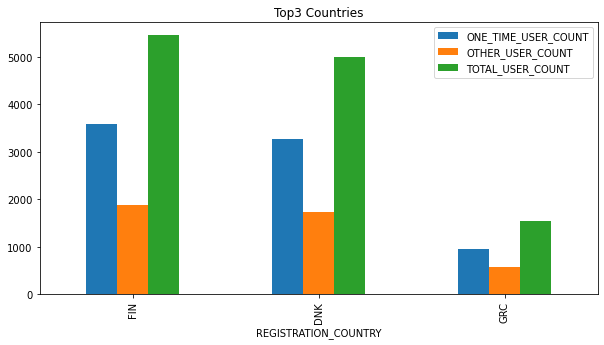

In [21]:
a = k[['ONE_TIME_USER_COUNT','OTHER_USER_COUNT','TOTAL_USER_COUNT']]
a.plot(kind='bar',figsize=(10,5),title='Top3 Countries')

The countries have more one time users as compared to the other consistant customers

<AxesSubplot:title={'center':'Top3 Countries'}, xlabel='REGISTRATION_COUNTRY'>

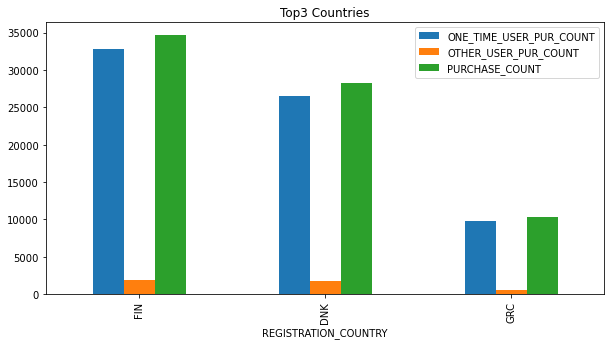

In [22]:
a = k[['ONE_TIME_USER_PUR_COUNT','OTHER_USER_PUR_COUNT','PURCHASE_COUNT']]
a.plot(kind='bar',figsize=(10,5),title='Top3 Countries')

The Purchases made by customers in these countries are mostly done by one time customers

## Valid Payment method 

In [23]:
print('Total Customer : ', len(customer_data_reg))
print("customer with valid Pay Method: " ,len(customer_data_reg[customer_data_reg['USER_HAS_VALID_PAYMENT_METHOD']==True])) 
print('customer with Invalid Pay Method: ', len(customer_data_reg) - len(customer_data_reg[customer_data_reg['USER_HAS_VALID_PAYMENT_METHOD']==True]))

Total Customer :  12028
customer with valid Pay Method:  7117
customer with Invalid Pay Method:  4911


In [24]:
Total_Customer = len(customer_data_reg)
Valid_pay_Customer = len(customer_data_reg[customer_data_reg['USER_HAS_VALID_PAYMENT_METHOD']==True])
Invalid_pat_Customer = len(customer_data_reg) - len(customer_data_reg[customer_data_reg['USER_HAS_VALID_PAYMENT_METHOD']==True])

a = Valid_pay_Customer/Total_Customer *100
b = Invalid_pat_Customer/Total_Customer *100
a,b

(59.170269371466574, 40.829730628533426)

59% of the customers uses valid payment method and 40 percent are with invalid payment method

#### The below table shows purchases done using the valid and invalide payment method by the user

- Almost 1/3 of the total purchase and revenue(EUR) is from user with Invalid Payment method from sep-oct

In [25]:
TEMP = customer_data_reg.groupby('USER_HAS_VALID_PAYMENT_METHOD')[['PURCHASE_COUNT','TOTAL_PURCHASES_EUR']].sum()
Temp2 = pd.merge(TEMP, customer_data_reg.groupby('USER_HAS_VALID_PAYMENT_METHOD')['USER_ID'].count() , on='USER_HAS_VALID_PAYMENT_METHOD')
Temp2.rename(columns={'USER_ID':'USER_COUNT'})

,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,USER_COUNT
USER_HAS_VALID_PAYMENT_METHOD,,,
False,23971,716704.472,4911
True,49570,1402754.452,7117


## Device Preferences  and cutomers purchases

- Most customers prefered Ios device
- The maximum purchase is done through IOS devices

In [26]:
dev = customer_data_reg[['PREFERRED_DEVICE','IOS_PURCHASES','WEB_PURCHASES','ANDROID_PURCHASES']]
temp = pd.merge(dev.groupby('PREFERRED_DEVICE').sum() , customer_data_reg.groupby('PREFERRED_DEVICE')['USER_ID'].count(),on='PREFERRED_DEVICE')
temp.rename(columns= {'USER_ID':'USER_COUNT'},inplace=True)
temp

,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_COUNT
PREFERRED_DEVICE,,,,
android,934.0,983.0,22967.0,4108
ios,30019.0,1134.0,563.0,5328
web,3934.0,10590.0,2416.0,2591


In [27]:
temp2 = temp.drop("USER_COUNT",axis=1).reset_index().drop('PREFERRED_DEVICE',axis=1)
temp2.sum()

IOS_PURCHASES        34887.0
WEB_PURCHASES        12707.0
ANDROID_PURCHASES    25946.0
dtype: float64

array([<AxesSubplot:ylabel='Total_Purchase_Device'>], dtype=object)

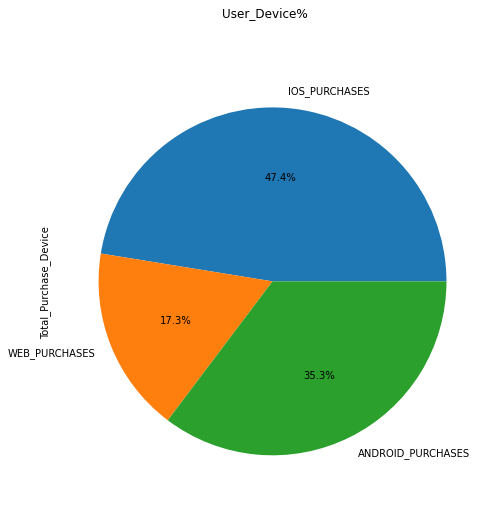

In [28]:
pd.DataFrame(temp2.sum(),columns=['Total_Purchase_Device']).plot(kind='pie',
                                                                 title='User_Device%',
                                                                 subplots=True,
                                                                 legend=False,figsize=(8,8),
                                                                 autopct='%1.1f%%')

## Understanding Prefered Resturant Types
- Total of 4267 Customers gave the prefered Resturant types
- 30% customer prefer the American resturant and is highest among all while the italian, mexican , japenese are the type which is prefered by more than 10% of the customers

In [29]:
a = pd.DataFrame(customer_data_reg[['PREFERRED_RESTAURANT_TYPES','USER_ID']].dropna()).reset_index().drop("index",axis=1)
a['PREFERRED_RESTAURANT_TYPES'] = a["PREFERRED_RESTAURANT_TYPES"].apply(lambda x: re.findall(r'\w+', x))
a = a.explode("PREFERRED_RESTAURANT_TYPES")
a

,PREFERRED_RESTAURANT_TYPES,USER_ID
0,american,14
1,american,17
2,japanese,18
3,italian,27
4,american,32
...,...,...
2662,american,21924
2663,chinese,21930
2664,italian,21948
2665,american,21970


In [30]:
res_pref  = a.groupby('PREFERRED_RESTAURANT_TYPES').count().rename(columns={'USER_ID':'USER_COUNT'})
# res_pref.sum()
res_pref["%ofcustomer"] = res_pref["USER_COUNT"]/res_pref.sum().values *100
res_pref

,USER_COUNT,%ofcustomer
PREFERRED_RESTAURANT_TYPES,,
american,1296,30.372627
chinese,29,0.679634
eastern,226,5.296461
greek,19,0.445278
hawaiian,24,0.562456
indian,230,5.390204
italian,920,21.560816
japanese,654,15.326928
korean,49,1.148348


<AxesSubplot:xlabel='PREFERRED_RESTAURANT_TYPES', ylabel='%of_Customer'>

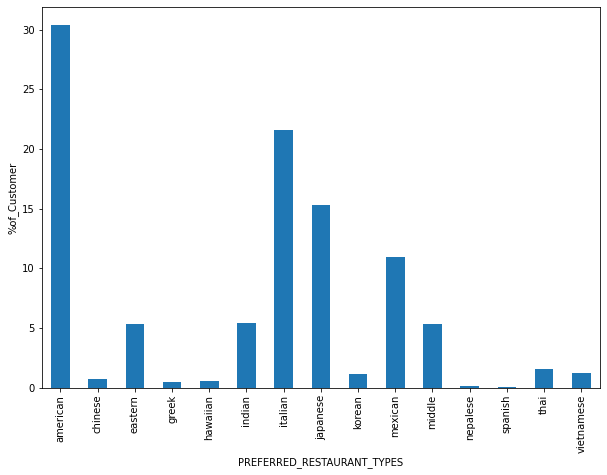

In [31]:
res_pref['%ofcustomer'].plot(kind='bar',ylabel='%of_Customer',figsize=(10,7))

## Purchase distribution
- Plotting distribution of purchases made at different time of day
- No late night purchases found
- Most are the dinner purchases

In [32]:
customer_data_reg.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
7,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-10-14 00:00:00.000,2020-10-14 00:00:00.000,8,0.0,0.0,...,0.0,1.0,NaN,True,5.0,1.0,NaN,NaN,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
12,2019-09-01 00:00:00.000,FIN,19,19.0,0.0,2020-04-18 00:00:00.000,2020-10-27 00:00:00.000,13,0.0,8.0,...,0.0,0.0,NaN,True,7.0,3.0,11.0,9.0,3.303,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
13,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-08-21 00:00:00.000,2020-09-09 00:00:00.000,14,0.0,1.0,...,0.0,2.0,"[\n ""american""\n]",False,5.0,6.0,19.0,19.0,1.382,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


### Based on total purchases

In [33]:
df = customer_data_reg[['USER_ID','BREAKFAST_PURCHASES','LUNCH_PURCHASES','EVENING_PURCHASES','DINNER_PURCHASES','LATE_NIGHT_PURCHASES']]
temp = pd.DataFrame(df.drop('USER_ID',axis=1).sum(), columns=['Total'])
temp

,Total
BREAKFAST_PURCHASES,2333.0
LUNCH_PURCHASES,28567.0
EVENING_PURCHASES,5935.0
DINNER_PURCHASES,36433.0
LATE_NIGHT_PURCHASES,0.0


array([<AxesSubplot:ylabel='Total'>], dtype=object)

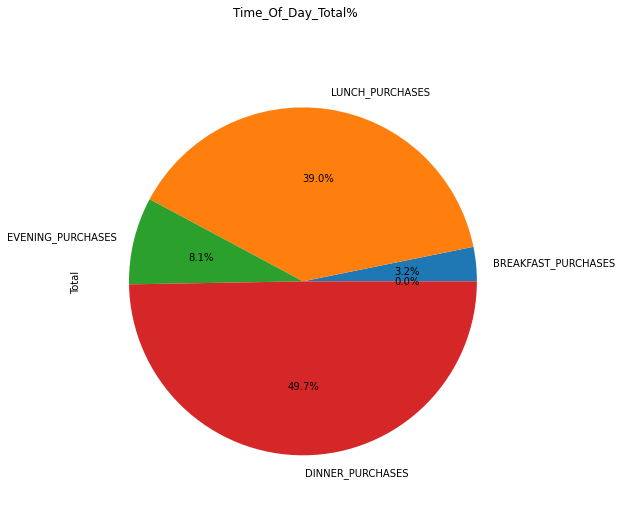

In [34]:
temp.plot(kind='pie', title='Time_Of_Day_Total%',subplots=True,legend=False,figsize=(8,8),autopct='%1.1f%%')

## Take Away and Delivery 
- Most purchases are delivery purchases
- 94% of the purchases are Delivery while the 4% of are Take Away

In [35]:
temp = customer_data_reg[['PURCHASE_COUNT','PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY']]
temp.head()

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY
1,1,1.0,0.0
2,19,19.0,0.0
7,1,1.0,0.0
12,19,19.0,0.0
13,2,2.0,0.0


In [36]:
temp.sum()

PURCHASE_COUNT             73541.0
PURCHASE_COUNT_DELIVERY    69061.0
PURCHASE_COUNT_TAKEAWAY     4480.0
dtype: float64

In [37]:
a,b,c = temp.sum().values

In [38]:
b/a *100, c/a*100

(93.90816007397234, 6.091839926027658)

### Purchase Count and Amount spend
- On average the single purcahse amounts to 31-EUR

In [39]:
df = customer_data_reg[['PURCHASE_COUNT','TOTAL_PURCHASES_EUR','MIN_PURCHASE_VALUE_EUR','MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR']].dropna()
df.head(), df.shape

(    PURCHASE_COUNT  TOTAL_PURCHASES_EUR  MIN_PURCHASE_VALUE_EUR  \
 1                1               38.456                  38.532   
 2               19              631.488                  20.280   
 7                1               19.228                  19.266   
 12              19              587.972                  19.266   
 13               2              118.404                  57.798   
 
     MAX_PURCHASE_VALUE_EUR  AVG_PURCHASE_VALUE_EUR  
 1                   38.608                  38.456  
 2                   43.688                  33.396  
 7                   19.304                  19.228  
 12                  47.752                  31.372  
 13                  60.960                  59.708  ,
 (12028, 5))

In [40]:
print('On average the single purcahse EUR: ' , df['AVG_PURCHASE_VALUE_EUR'].mean())
print('On average the single max purcahse EUR: ' , df['MAX_PURCHASE_VALUE_EUR'].mean())
print('On average the single min purcahse EUR: ' , df['MIN_PURCHASE_VALUE_EUR'].mean())

On average the single purcahse EUR:  31.195059860325436
On average the single max purcahse EUR:  42.06804256734267
On average the single min purcahse EUR:  24.428312105087972


## Only One time Customer Purchase

- Almost 1/3 of the customer did only one time purchases
- Howere the revenue total from one time customer makes up only 6.3% of the total purchase in EUR

In [41]:
temp = df[df['PURCHASE_COUNT']==1]
temp.head()

,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR
1,1,38.456,38.532,38.608,38.456
7,1,19.228,19.266,19.304,19.228
22,1,25.300,25.350,25.400,25.300
24,1,14.168,14.196,14.224,14.168
37,1,64.768,64.896,65.024,64.768


In [42]:
print('Total Customer : ', len(df))
print('Customer with only one time purchase  : ', len(temp))

Total Customer :  12028
Customer with only one time purchase  :  4179


<BarContainer object of 2 artists>

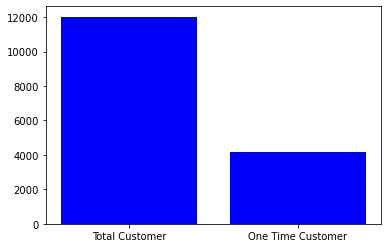

In [43]:
plt.bar(['Total Customer', 'One Time Customer'], [len(df),len(temp)], color ='blue')

In [44]:
print("Amount from one time customer : " ,temp["TOTAL_PURCHASES_EUR"].sum())
print("Amount from other customer : " ,df[df["PURCHASE_COUNT"]>1]["TOTAL_PURCHASES_EUR"].sum())

Amount from one time customer :  133548.58000000002
Amount from other customer :  1985910.344


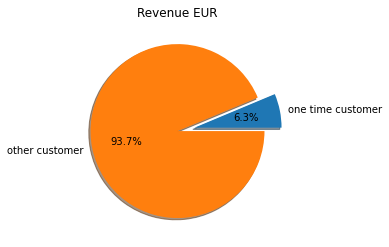

In [45]:
import numpy as np
y = np.array([temp["TOTAL_PURCHASES_EUR"].sum(),df[df["PURCHASE_COUNT"]>1]["TOTAL_PURCHASES_EUR"].sum()])
labels = ['one time customer' , 'other customer']
explode = [0.2, 0]
plt.pie(y, labels = labels, explode = explode, shadow = True,autopct='%1.1f%%')
plt.title('Revenue EUR')
plt.show()

In [46]:
from scipy.stats import pearsonr
df = customer_data_reg[['PURCHASE_COUNT','TOTAL_PURCHASES_EUR']]
corr, _ = pearsonr(df['PURCHASE_COUNT'], df['TOTAL_PURCHASES_EUR'])
print("Pearson correlation coefficient: {:.3f}".format(corr))

Pearson correlation coefficient: 0.855


## Purchase Count By store 
- Most are the resturant purchases -> 60%

In [47]:
customer_data_reg[ "PURCHASE_COUNT_BY_STORE_TYPE"].iloc[0]

'{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 1,\n  "Retail store": 0\n}'

In [48]:
import json
# Function to convert the string representation of a dictionary into a Python dictionary
def parse_dict(s):
    # Remove newlines and spaces
    s = s.replace('\n', '').replace(' ', '')
    # Parse the JSON string and return the resulting dictionary
    return json.loads(s)

# Apply the parse_dict function to the 'category_counts' column to create a list of dictionaries
dict_list = [parse_dict(s) for s in customer_data_reg[ "PURCHASE_COUNT_BY_STORE_TYPE"]]

# Create a pandas dataframe from the list of dictionaries
df = pd.DataFrame(dict_list)

# Rename the columns to remove spaces
df.columns = [c.replace(' ', '_') for c in df.columns]

Text(0.5, 1.0, '%Purchase Count By Store')

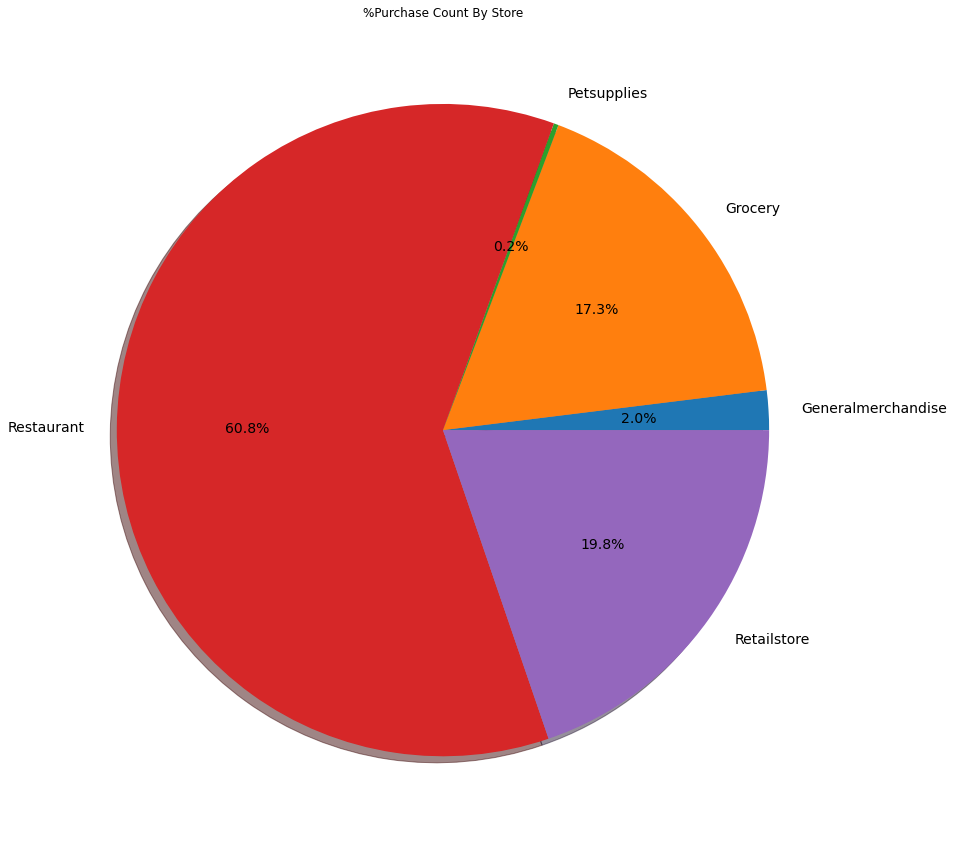

In [49]:
df.sum().plot(kind='pie',figsize=(15,15), autopct='%1.1f%%',shadow = True,fontsize=14)
plt.ylabel(None)
plt.title('%Purchase Count By Store')

In [50]:
df.sum()

Generalmerchandise     1442
Grocery               12707
Petsupplies             175
Restaurant            44692
Retailstore           14525
dtype: int64

## Analysing Most common time of day

In [51]:
temp = customer_data_reg[['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE','PURCHASE_COUNT']]
temp2 = customer_data_reg[['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE','USER_ID']]
a = temp.groupby('MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE').sum().rename(columns={'PURCHASE_COUNT':'PURCHASE_SUM'})
b = temp2.groupby('MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE').count().rename(columns={'USER_ID':'USER_COUNT'})

In [52]:
c= pd.merge(a,b,on='MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE')

<AxesSubplot:xlabel='MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE', ylabel='PURCHASES'>

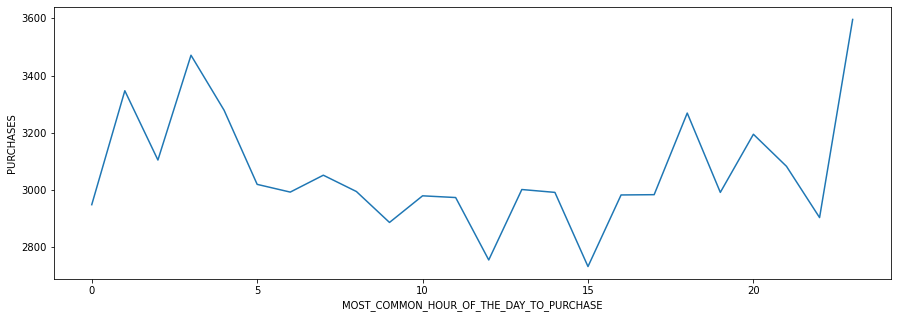

In [53]:
c['PURCHASE_SUM'].plot(figsize=(15,5), ylabel='PURCHASES')

<AxesSubplot:xlabel='MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE', ylabel='USER_COUNT'>

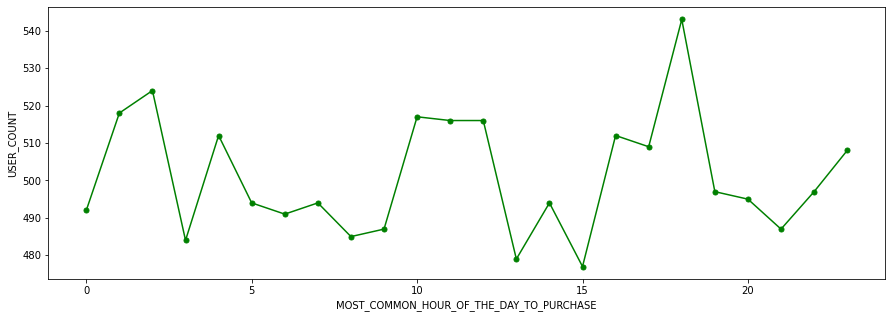

In [54]:
c['USER_COUNT'].plot(figsize=(15,5), ylabel='USER_COUNT',color='g',marker='.',markersize=10)

In [55]:
c

,PURCHASE_SUM,USER_COUNT
MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,,
0.0,2949,492
1.0,3347,518
2.0,3105,524
3.0,3471,484
4.0,3279,512
5.0,3020,494
6.0,2993,491
7.0,3052,494
8.0,2995,485


In [56]:
c.describe()

,PURCHASE_SUM,USER_COUNT
count,24.000000,24.000000
mean,3064.208333,501.166667
std,204.833332,16.198944
min,2733.000000,477.000000
25%,2978.500000,490.000000
50%,2994.000000,496.000000
75%,3127.500000,513.000000
max,3596.000000,543.000000


## Analysing Most common weekday
- All the days of week have same percentage of customers

In [57]:
temp = customer_data_reg[['MOST_COMMON_WEEKDAY_TO_PURCHASE','PURCHASE_COUNT']]
temp2 = customer_data_reg[['MOST_COMMON_WEEKDAY_TO_PURCHASE','USER_ID']]
a = temp.groupby('MOST_COMMON_WEEKDAY_TO_PURCHASE').sum().rename(columns={'PURCHASE_COUNT':'PURCHASE_SUM'})
b = temp2.groupby('MOST_COMMON_WEEKDAY_TO_PURCHASE').count().rename(columns={'USER_ID':'USER_COUNT'})
c= pd.merge(a,b,on='MOST_COMMON_WEEKDAY_TO_PURCHASE')
c

,PURCHASE_SUM,USER_COUNT
MOST_COMMON_WEEKDAY_TO_PURCHASE,,
1.0,10259,1720
2.0,10737,1753
3.0,10509,1623
4.0,11518,1773
5.0,9694,1682
6.0,10066,1699
7.0,10758,1778


Text(0.5, 1.0, '%MOST_COMMON_WEEKDAY_TO_PURCHASE')

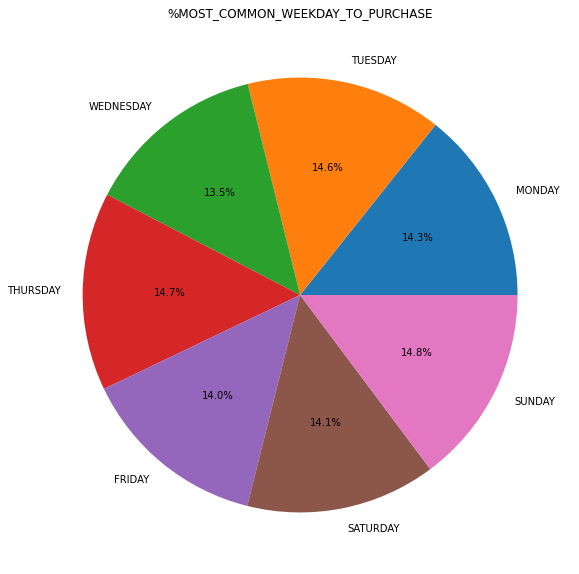

In [58]:
label = ['MONDAY', 'TUESDAY' , 'WEDNESDAY' , 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
c['USER_COUNT'].plot(kind='pie', labels= label,autopct='%1.1f%%',figsize=(10,10))
plt.ylabel(None)
plt.title('%MOST_COMMON_WEEKDAY_TO_PURCHASE')

In [59]:
customer_data_reg['AVERAGE_DELIVERY_DISTANCE_KMS'].describe()

count    12028.000000
mean         5.961218
std          3.466263
min          0.002000
25%          2.950500
50%          5.928000
75%          8.978000
max         11.999000
Name: AVERAGE_DELIVERY_DISTANCE_KMS, dtype: float64

# CUSTOMER SEGMENTATION

## Segmentation Based on Activity

In [60]:
customer_data_reg['AVG_DAYS_BETWEEN_PURCHASES'].describe()
# the mean 64 is chosen for segmenting the customers , since on average the customer has a 64 days difference between purchaces

count    7832.000000
mean       64.293539
std        72.570103
min         0.000000
25%        18.000000
50%        39.500000
75%        81.000000
max       421.000000
Name: AVG_DAYS_BETWEEN_PURCHASES, dtype: float64

In [61]:
customer_data_reg['MEDIAN_DAYS_BETWEEN_PURCHASES'].describe()

count    7832.000000
mean       55.792135
std        74.963336
min         0.000000
25%        10.000000
50%        25.000000
75%        68.250000
max       421.000000
Name: MEDIAN_DAYS_BETWEEN_PURCHASES, dtype: float64

C:\Users\talha\AppData\Local\Temp\ipykernel_14912\897164974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REGISTRATION_DATE'] = pd.to_datetime(df['REGISTRATION_DATE'])
C:\Users\talha\AppData\Local\Temp\ipykernel_14912\897164974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
C:\Users\talha\AppData\Local\Temp\ipykernel_14912\897164974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

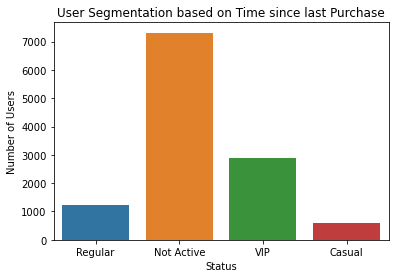

In [62]:
df = customer_data_reg[['REGISTRATION_DATE','FIRST_PURCHASE_DAY','LAST_PURCHASE_DAY']]
df['REGISTRATION_DATE'] = pd.to_datetime(df['REGISTRATION_DATE'])
df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])
start_date = pd.to_datetime('2019-09-01')
df['days_since_registration'] = (df['REGISTRATION_DATE'] - start_date).dt.days
df['days_between_first_last_purchase'] = (df['LAST_PURCHASE_DAY'] - df['FIRST_PURCHASE_DAY']).dt.days
end_date = pd.to_datetime('2020-10-31')
df['days_since_last_purchase'] = (end_date - df['LAST_PURCHASE_DAY']).dt.days
def last_purchase_segment(days_since_last_purchase):
    if days_since_last_purchase <= 30:
        return 'VIP'
    elif days_since_last_purchase > 30 and days_since_last_purchase <= 64:
        return 'Regular'
    elif days_since_last_purchase > 64 and days_since_last_purchase <= 90:
        return 'Casual'
    else:
        return 'Not Active'
df['last_purchase_segment'] = df['days_since_last_purchase'].apply(last_purchase_segment)
sns.countplot(x='last_purchase_segment', data=df)
plt.title('User Segmentation based on Time since last Purchase')
plt.xlabel('Status')
plt.ylabel('Number of Users')
plt.show()


## Segmentation based on Purchase count and Amount Spend

In [63]:
# With one time customers
df = customer_data_reg[['PURCHASE_COUNT','TOTAL_PURCHASES_EUR']]
df.mean() , df.median() , df.max()

(PURCHASE_COUNT           6.114150
 TOTAL_PURCHASES_EUR    176.210419
 dtype: float64,
 PURCHASE_COUNT          3.0
 TOTAL_PURCHASES_EUR    75.9
 dtype: float64,
 PURCHASE_COUNT          320.00
 TOTAL_PURCHASES_EUR    7979.62
 dtype: float64)

In [64]:
df.describe()

,PURCHASE_COUNT,TOTAL_PURCHASES_EUR
count,12028.000000,12028.000000
mean,6.114150,176.210419
std,10.763064,299.086986
min,1.000000,1.012000
25%,1.000000,32.384000
50%,3.000000,75.900000
75%,6.000000,196.328000
max,320.000000,7979.620000


In [65]:
# without one time ustomers
df = customer_data_reg[['PURCHASE_COUNT','TOTAL_PURCHASES_EUR']]

In [66]:

def purchase_count_segment(purchase_count):
    if purchase_count == 1:
        return 'One Time Purchase'
    elif purchase_count > 1 and purchase_count <= 3:
        return 'Median Purchase'
    elif purchase_count > 3 and purchase_count <= 7:
        return 'Average Purchase'
    else:
        return 'High Purchase'
df['purchase_count_segment'] = df['PURCHASE_COUNT'].apply(purchase_count_segment)




C:\Users\talha\AppData\Local\Temp\ipykernel_14912\987733392.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purchase_count_segment'] = df['PURCHASE_COUNT'].apply(purchase_count_segment)


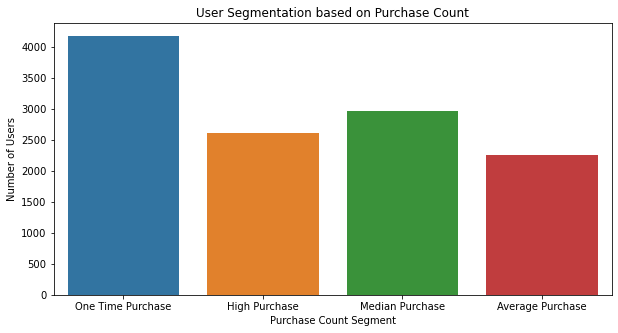

In [67]:
# Visualize the results
plt.figure(figsize=(10,5))
sns.countplot(x='purchase_count_segment', data=df)
plt.title('User Segmentation based on Purchase Count')
plt.xlabel('Purchase Count Segment')
plt.ylabel('Number of Users')
plt.show()


In [68]:
df = customer_data_reg[['PURCHASE_COUNT','TOTAL_PURCHASES_EUR']]
df = df[df['PURCHASE_COUNT']>1]
df.describe()

,PURCHASE_COUNT,TOTAL_PURCHASES_EUR
count,7849.000000,7849.000000
mean,8.837049,253.014441
std,12.497485,346.038189
min,2.000000,6.072000
25%,3.000000,74.888000
50%,5.000000,141.680000
75%,10.000000,298.540000
max,320.000000,7979.620000


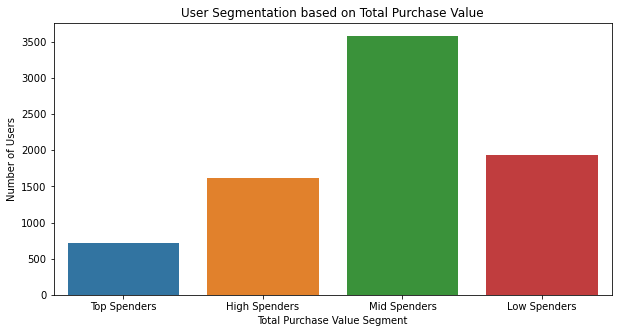

In [74]:
def purchase_value_segment(total_purchase_value):
    if total_purchase_value <= 74:
        return 'Low Spenders'
    elif total_purchase_value > 74 and total_purchase_value <= 253.014441:
        return 'Mid Spenders'
    elif total_purchase_value > 253.014441 and total_purchase_value <= 600:
        return 'High Spenders'
    else:
        return 'Top Spenders'
df['purchase_value_segment'] = df['TOTAL_PURCHASES_EUR'].apply(purchase_value_segment)


plt.figure(figsize=(10,5))
sns.countplot(x='purchase_value_segment', data=df)
plt.title('User Segmentation based on Total Purchase Value')
plt.xlabel('Total Purchase Value Segment')
plt.ylabel('Number of Users')
plt.show()

In [75]:
df

,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,purchase_value_segment
2,19,631.488,Top Spenders
12,19,587.972,High Spenders
13,2,118.404,Mid Spenders
15,2,107.272,Mid Spenders
16,7,284.372,High Spenders
...,...,...,...
21966,2,95.128,Mid Spenders
21969,6,115.368,Mid Spenders
21971,25,247.940,Mid Spenders
21972,4,52.624,Low Spenders


### Customer By Store Type

In [78]:
# Segment users based on purchase count by store type
import json
# Function to convert the string representation of a dictionary into a Python dictionary
def parse_dict(s):
    # Remove newlines and spaces
    s = s.replace('\n', '').replace(' ', '')
    # Parse the JSON string and return the resulting dictionary
    return json.loads(s)

# Apply the parse_dict function to the 'category_counts' column to create a list of dictionaries
dict_list = [parse_dict(s) for s in customer_data_reg[ "PURCHASE_COUNT_BY_STORE_TYPE"]]

# Create a pandas dataframe from the list of dictionaries
df = pd.DataFrame(dict_list)

# Rename the columns to remove spaces
df.columns = [c.replace(' ', '_') for c in df.columns]

df.head()

,Generalmerchandise,Grocery,Petsupplies,Restaurant,Retailstore
0,0,0,0,1,0
1,1,9,0,9,0
2,0,0,0,1,0
3,1,9,0,9,0
4,0,0,0,2,0


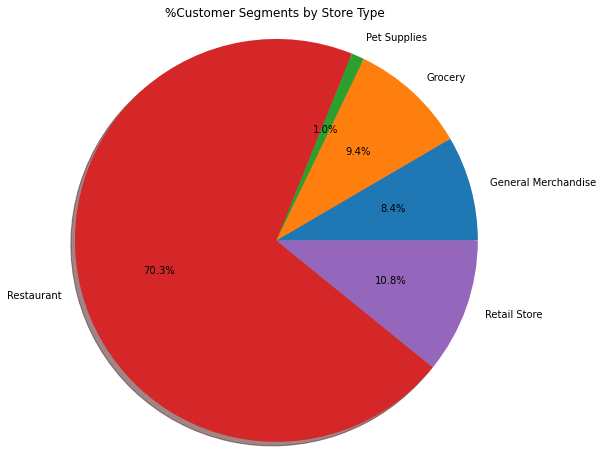

In [79]:
general_merchandise_count = len(df[df['Generalmerchandise'] >= 1])
grocery_count = len(df[df['Grocery'] >= 1])
pet_supplies_count = len(df[df['Petsupplies'] >= 1])
restaurant_count = len(df[df['Restaurant'] >= 1])
retail_store_count = len(df[df['Retailstore'] >= 1])

counts = [general_merchandise_count, grocery_count, pet_supplies_count, restaurant_count, retail_store_count]
labels = ['General Merchandise', 'Grocery', 'Pet Supplies', 'Restaurant', 'Retail Store']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
ax.set_title('%Customer Segments by Store Type')
plt.show()

## Customer By breakfast,lunch,evening, dinner and late night of day purchase

In [68]:
df = customer_data_reg[['USER_ID','BREAKFAST_PURCHASES','LUNCH_PURCHASES','EVENING_PURCHASES','DINNER_PURCHASES','LATE_NIGHT_PURCHASES']]
df

,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES
1,2,0.0,1.0,0.0,0.0,0.0
2,3,0.0,4.0,1.0,14.0,0.0
7,8,0.0,0.0,1.0,0.0,0.0
12,13,0.0,8.0,0.0,11.0,0.0
13,14,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
21973,21974,0.0,0.0,0.0,1.0,0.0
21975,21976,2.0,2.0,0.0,0.0,0.0
21976,21977,0.0,0.0,1.0,0.0,0.0
21978,21979,0.0,0.0,1.0,0.0,0.0


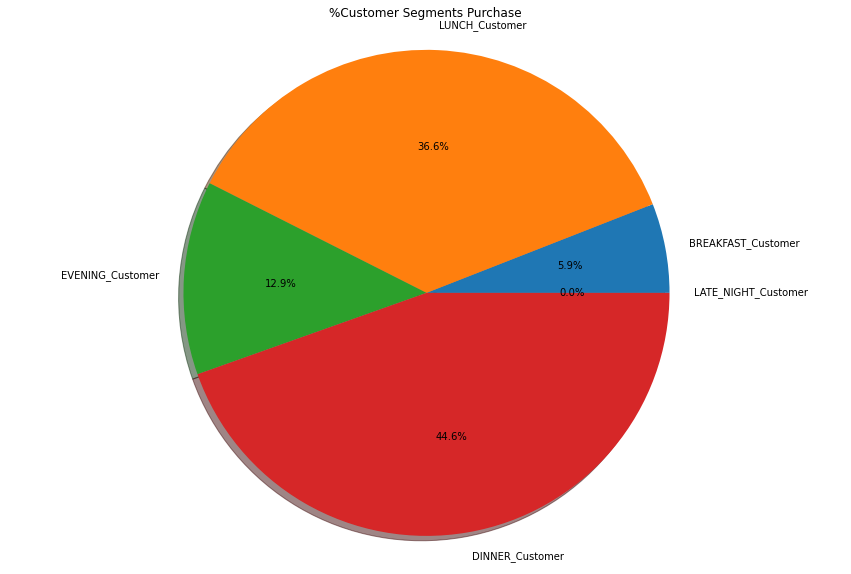

In [69]:
BREAKFAST_PURCHASES = len(df[df['BREAKFAST_PURCHASES'] >= 1])
LUNCH_PURCHASES = len(df[df['LUNCH_PURCHASES'] >= 1])
EVENING_PURCHASES = len(df[df['EVENING_PURCHASES'] >= 1])
DINNER_PURCHASES = len(df[df['DINNER_PURCHASES'] >= 1])
LATE_NIGHT_PURCHASES = len(df[df['LATE_NIGHT_PURCHASES'] >= 1])

counts = [BREAKFAST_PURCHASES, LUNCH_PURCHASES, EVENING_PURCHASES, DINNER_PURCHASES, LATE_NIGHT_PURCHASES]
labels = ['BREAKFAST_Customer', 'LUNCH_Customer', 'EVENING_Customer', 'DINNER_Customer', 'LATE_NIGHT_Customer']

fig, ax = plt.subplots(figsize=(15, 10))
ax.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
ax.set_title('%Customer Segments Purchase')
plt.show()

In [70]:
dev = customer_data_reg[['PREFERRED_DEVICE','IOS_PURCHASES','WEB_PURCHASES','ANDROID_PURCHASES']]
dev

,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES
1,android,0.0,0.0,1.0
2,android,0.0,19.0,0.0
7,android,0.0,0.0,1.0
12,ios,19.0,0.0,0.0
13,ios,0.0,0.0,2.0
...,...,...,...,...
21973,android,0.0,0.0,1.0
21975,android,0.0,0.0,4.0
21976,android,0.0,0.0,1.0
21978,android,0.0,0.0,1.0


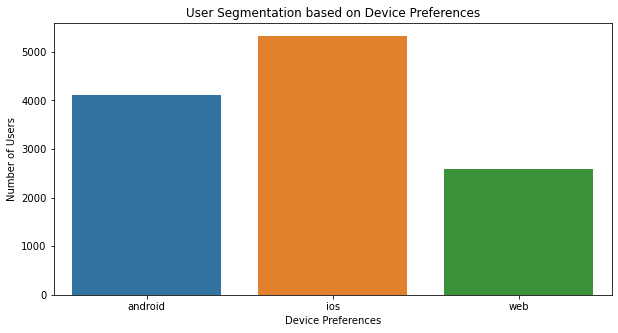

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(x='PREFERRED_DEVICE', data=dev)
plt.title('User Segmentation based on Device Preferences')
plt.xlabel('Device Preferences')
plt.ylabel('Number of Users')
plt.show()

In [75]:
data = customer_data_reg[['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE','USER_ID','AVERAGE_DELIVERY_DISTANCE_KMS']]
data['AVERAGE_DELIVERY_DISTANCE_KMS'].describe()

count    12028.000000
mean         5.961218
std          3.466263
min          0.002000
25%          2.950500
50%          5.928000
75%          8.978000
max         11.999000
Name: AVERAGE_DELIVERY_DISTANCE_KMS, dtype: float64

In [83]:
def dist_segment(total_purchase_value):
    if total_purchase_value <= 2.95:
        return 'short_distance'
    elif total_purchase_value > 2.95 and total_purchase_value <= 5.92:
        return 'medium_distance'
    elif total_purchase_value > 5.92 and total_purchase_value <= 8.97:
        return 'long_distance'
    else:
        return 'very_long_distance'

data['distance_value_segment'] = data['AVERAGE_DELIVERY_DISTANCE_KMS'].apply(dist_segment)

C:\Users\talha\AppData\Local\Temp\ipykernel_14064\3798510895.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance_value_segment'] = data['AVERAGE_DELIVERY_DISTANCE_KMS'].apply(dist_segment)


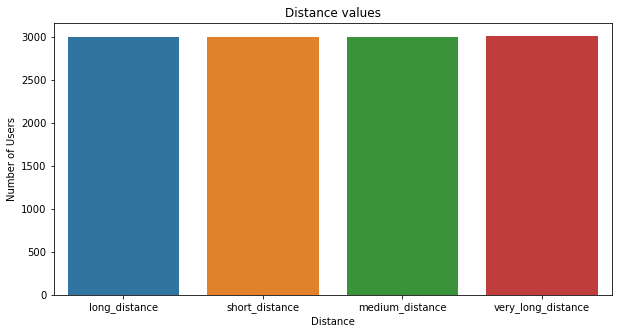

In [84]:
plt.figure(figsize=(10,5))
sns.countplot(x='distance_value_segment', data=data)
plt.title('Distance values')
plt.xlabel('Distance')
plt.ylabel('Number of Users')
plt.show()

In [88]:
data = customer_data_reg[['PURCHASE_COUNT','AVERAGE_DELIVERY_DISTANCE_KMS']]
data

,PURCHASE_COUNT,AVERAGE_DELIVERY_DISTANCE_KMS
1,1,6.853
2,19,6.559
7,1,1.251
12,19,3.303
13,2,1.382
...,...,...
21973,1,4.045
21975,4,11.540
21976,1,2.365
21978,1,1.383


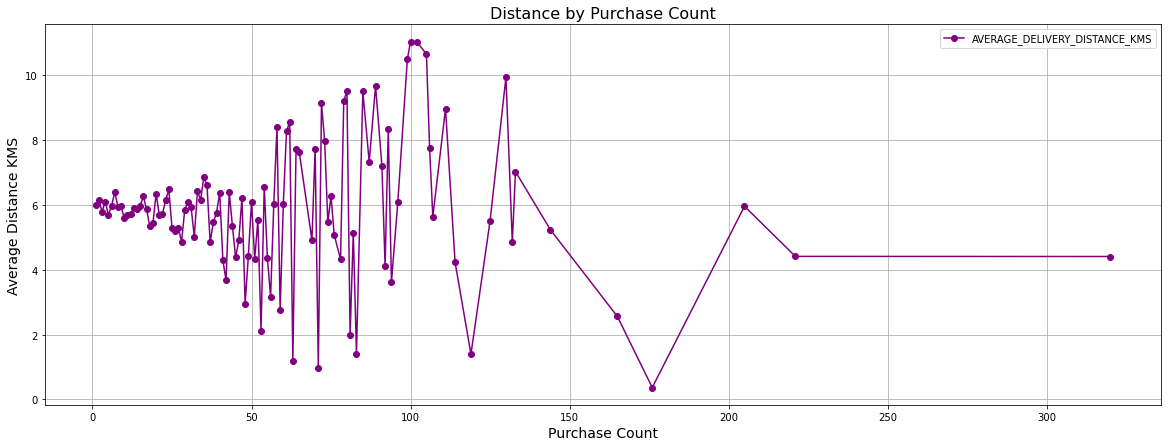

In [92]:
data.groupby('PURCHASE_COUNT').mean().plot(figsize=(20,7), color='purple', style='o-')
plt.title('Distance by Purchase Count', fontsize=16)
plt.xlabel('Purchase Count', fontsize=14)
plt.ylabel('Average Distance KMS', fontsize=14)
plt.grid(True)


In [90]:
from scipy.stats import pearsonr
# df = customer_data_reg[['PURCHASE_COUNT','TOTAL_PURCHASES_EUR']]
corr, _ = pearsonr(data['PURCHASE_COUNT'], data['AVERAGE_DELIVERY_DISTANCE_KMS'])
print("Pearson correlation coefficient: {:.3f}".format(corr))

Pearson correlation coefficient: -0.018


In [91]:
data.mean()

PURCHASE_COUNT                   6.114150
AVERAGE_DELIVERY_DISTANCE_KMS    5.961218
dtype: float64